<a href="https://colab.research.google.com/github/Yucheol-Son-BYUI/CSE310_W0_HelloWorld/blob/main/Unit3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prepraion

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test.csv")
df.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0


## Data Definitions

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but
no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the
waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction
and design, 7 has an average level of construction and design, and 11-13 have a
high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above
ground level

sqft_basement - The square footage of the interior housing space that is below
ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house was listed in

lat - Latitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the
nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Data exploration

In [ ]:
df.describe(include="number").round(3)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,4.580297e+09,3.370,2.116,2079.883,15015.329,1.496,0.008,0.235,3.410,7.658,1790.233,289.650,1971.100,82.732,98077.877,47.560,-122.214,1986.388,12748.960,539436.713
std,2.875295e+09,0.932,0.770,919.434,39701.348,0.541,0.087,0.768,0.652,1.175,829.587,441.537,29.374,397.872,53.438,0.139,0.141,685.212,27076.489,366433.436
min,1.000102e+06,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,75000.000
25%,2.123049e+09,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1200.000,0.000,1951.750,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3.904955e+09,3.000,2.250,1910.000,7620.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.571,-122.230,1840.000,7622.000,450000.000
75%,7.309825e+09,4.000,2.500,2550.000,10710.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98117.000,47.678,-122.124,2360.000,10088.250,641625.000
max,9.900000e+09,33.000,8.000,13540.000,1164794.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


# Data Preprocess

In [ ]:
# date: str -> date
df['date'] = pd.to_datetime(df['date'])

#### REMOVE WEIRD OUTLIERS
# 3326079016 for price error 710	1164794인데 190000원
# 2402100895 for 33 bedroodms
target_ids = [2402100895, 3326079016]
df = df[~df['id'].isin(target_ids)]

# categorize
# df['waterfront'] = df['waterfront'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')

# no bedrooms & bathrooms
df = df[~((df["bedrooms"] == 0) | (df["bathrooms"] == 0))]

# id: drop
df = df.drop("id", axis=1)

# Date -> year, month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df = df.drop('date', axis=1)



##### logarithm
df['price_log'] = np.log1p(df['price'])


In [ ]:
df['price_log'].describe()

,price_log
count,19984.000000
mean,13.047572
std,0.525374
min,11.264477
25%,12.682310
50%,13.017005
75%,13.372345
max,15.856731


# Feature Engineering

In [ ]:

# 1. average price per area grouped by zipcode
## temp variation(not used in predict)
df['price_per_sqft'] = df['price'] / df['sqft_living']
## create zip_price mapping
zip_map = df.groupby('zipcode')['price_per_sqft'].mean().to_dict()
global_mean = df['price_per_sqft'].mean()
## mapping(with safety if holdout has new zipcode)
df['zip_index'] = df['zipcode'].astype(float).map(zip_map).fillna(global_mean)
## drop temp var
df = df.drop('price_per_sqft', axis=1)


# 2. housing structure derived features
# total rooms
# df['total_rooms'] = df['bedrooms'] + df['bathrooms']
# ratio bath-bed
df['room_ratio'] = df['bathrooms'] / df['bedrooms']

# living per room
# df['living_per_room'] = df['sqft_living'] / (df['bedrooms'] + df['bathrooms'])

df['sqft_living_log'] = np.log1p(df['sqft_living'])
df['luxary_score'] = df['grade'] * df['sqft_living_log']
df = df.drop('sqft_living_log', axis=1)

# lot per floor : delete
# df['lot_per_floor'] = df['sqft_lot'] / df['floors']
# living per floor
# df['living_per_floor'] = df['sqft_living'] / df['floors']

# living_lot_ratio
# df['living_lot_ratio'] = df['sqft_living'] / df['sqft_lot']

# basement : delete
df['has_basement'] = (df['sqft_basement'] > 0).astype(int)


# 3. bigger than neighbor
# living_size
# df['relative_living_size'] = df['sqft_living'] / df['sqft_living15']

# lot_size
# df['relative_lot_size'] = df['sqft_lot'] / df['sqft_lot15']


# 4. Time decay
# Housing age
df['house_age'] = df['year'] - df['yr_built']

# years_since_update
df['last_update'] = df[['yr_built', 'yr_renovated']].max(axis=1) # renovated year is 0 if never renovated
df['years_since_update'] = df['year'] - df['last_update']
# drop temp
df = df.drop('last_update', axis=1)

# distance from center(only for seattle)
df['dist_to_seattle'] = np.sqrt((df['lat'] - 47.6062)**2 + (df['long'] + 122.3321)**2) # City Hall
df['dist_to_tech_hub'] = np.sqrt((df['lat'] - 47.6101)**2 + (df['long'] + 122.2015)**2) # Redmond (Microsoft HQ)

# better than neighbor(zipcode)
zip_avg_grade = df.groupby('zipcode')['grade'].transform('mean')
df['grade_relative_to_zip'] = df['grade'] / zip_avg_grade


/tmp/ipython-input-2660565647.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_map = df.groupby('zipcode')['price_per_sqft'].mean().to_dict()
/tmp/ipython-input-2660565647.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zip_avg_grade = df.groupby('zipcode')['grade'].transform('mean')


# Delete features


In [ ]:
df = df.drop(['year', 'yr_renovated', 'condition', 'bathrooms', 'bedrooms', 'floors', 'sqft_above', 'yr_built', 'month', 'zipcode', "sqft_basement", "sqft_lot15", "sqft_lot"], axis=1)

# Model Training

In [ ]:
## prototype

##### RANDOM FOREST #####
# from sklearn.ensemble import RandomForestRegressor  # Classifier -> Regressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # 1. 데이터 준비
# X = df.drop(['price','price_log'], axis=1, errors='ignore')
# y = df['price']
# ## log
# # X = df.drop(['price','price_log'], axis=1, errors='ignore')
# # y = df['price_log']

# # 2. ssplit
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 3. 그리드
# param_grid = {
#     'n_estimators': [200],
#     'max_depth': [25],
# #     'min_samples_split': [2, 5],
#     'max_features': ['sqrt']
# }

# # 4. MODEL: rf regressor
# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
#                            cv=5, n_jobs=-1, scoring='r2')

# grid_search.fit(X_train, y_train)

# # 5. REPORT
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best CV R2 Score: {grid_search.best_score_:.4f}")

# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# print(f"Test R2 Score: {r2_score(y_test, y_pred):.4f}")

# import xgboost as xgb
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


###### XGBOOST
# df['waterfront'] = df['waterfront'].astype(int)  # 또는 float
# X = df.drop(['price', 'price_log'], axis=1, errors='ignore')
# y = df['price']

# # 2. 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# param_grid = {
#     'n_estimators': [3000],
#     'learning_rate': [0.01],
#     'max_depth': [6],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8],
#     'reg_lambda': [1,2,5]
# }

# MODEL: XGBOOST
# xgb_reg = xgb.XGBRegressor(
#     random_state=42,
#     tree_method='hist',
#     device='cuda',
#     n_jobs=-1,
#     early_stopping_rounds=50,
# )

# grid_search_xgb = GridSearchCV(
#     estimator=xgb_reg,
#     param_grid=param_grid,
#     cv=5,
#     n_jobs=-1,
#     scoring='r2',
#     verbose=1
# )

# # grid_search_xgb.fit(X_train, y_train)
# grid_search_xgb.fit(
#     X_train, y_train,
#     eval_set=[(X_test, y_test)],
#     verbose=False
# )

# # 5. ERPORT
# print(f"Best Parameters: {grid_search_xgb.best_params_}")

# # 6. log -> actural
# best_model = grid_search_xgb.best_estimator_
# y_pred = best_model.predict(X_test)

# print(f"Test R2 Score: {r2_score(y_test, y_pred):.4f}")
# print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.0f}")
# print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.0f}")
# # test for luxuary housing
# luxury_threshold = y_test.quantile(0.95)
# luxury_idx = y_test >= luxury_threshold

# luxury_mae = mean_absolute_error(y_test[luxury_idx], best_model.predict(X_test[luxury_idx]))

# print(f"Luxury Segment MAE: ${luxury_mae:,.2f}")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df['waterfront'] = df['waterfront'].astype(int) # categorical -> numerical for XGBoost model
X = df.drop(['price', 'price_log'], axis=1, errors='ignore')
y = df['price_log']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [10000],
    'learning_rate': [0.003],
    'max_depth': [6],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_lambda': [1]
}

# Model: xg booster
xgb_reg = xgb.XGBRegressor(
    random_state=42,
    tree_method='hist',
    # device='cuda', ##################################### local training
    n_jobs=-1,
    early_stopping_rounds=50,
)

grid_search_xgb = GridSearchCV(
    estimator=xgb_reg,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='r2',
    verbose=1
)

# grid_search_xgb.fit(X_train, y_train)
grid_search_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=False
)

print(f"Best Parameters: {grid_search_xgb.best_params_}")
best_model = grid_search_xgb.best_estimator_
y_pred_log = best_model.predict(X_test)

# log -> actual price
y_test_real = np.expm1(y_test)
y_pred_real = np.expm1(y_pred_log)


# 5. Report
print(f"Test R2 Score: {r2_score(y_test_real, y_pred_real):.4f}")
print(f"MAE: ${mean_absolute_error(y_test_real, y_pred_real):,.0f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test_real, y_pred_real)):,.0f}")

# 7. Report for luxuary segment
luxury_threshold = y_test_real.quantile(0.95)
luxury_idx = y_test_real >= luxury_threshold

luxury_mae = mean_absolute_error(y_test_real[luxury_idx], y_pred_real[luxury_idx])
print(f"Luxury Segment MAE: ${luxury_mae:,.2f}")
print(f"iteration: {best_model.best_iteration}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.003, 'max_depth': 6, 'n_estimators': 10000, 'reg_lambda': 1, 'subsample': 0.8}
Test R2 Score: 0.9124
MAE: $63,077
RMSE: $103,579
Luxury Segment MAE: $232,694.65
iteration: 7173


# 1차
RF: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8535

MAE: $77,653

RMSE: $145,014

# 2차
RF: {'max_depth': 24, 'max_features': 'sqrt', 'n_estimators': 250

R2 Score: 0.8616

MAE: $74,749

RMSE: $140,908

# 3차 (빠른 학습을 위해 작은거 사용, date -> year&month)
RF: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8666

MAE: $77,148

RMSE: $141,574

# 4차 (bathrooms, bedrooms 0인 것 삭제)
RF: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8713

MAE: $75,238

RMSE: $125,567

# 5차 (feature engineering)
RF: {'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8803

MAE: $70,958

RMSE: $121,091

# 5차
RF: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8841

MAE: $68,622

RMSE: $119,173

# 7차 delete month, yr_renovated, condition, has_basement, floors, bed/bathrooms
RF: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8881

MAE: $68,014

RMSE: $117,068

df = df.drop(['year', 'yr_renovated', 'condition', 'bathrooms', 'bedrooms', 'floors', 'sqft_above', 'yr_built',], axis=1)


# 8차 month, relative_lot_size
RF: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8886

MAE: $68,076

RMSE: $116,825

Luxury Segment MAE: $271,039.97

# 9차 zip_code
RF: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8876

MAE: $68,370

RMSE: $117,318

$270,795.67

# 10차 living_lot_ratio, sqft_basement, relative_living_size, sqft_lot15, sqft_lot
RF: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}

R2 Score: 0.8874

MAE: $68,800

RMSE: $117,437

Luxury Segment MAE: $265,899.32

# 11차 xgboost
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}

Test R2 Score: 0.8897

MAE: $67,179

RMSE: $116,230

Luxury Segment MAE: $253,419.02*

# 12차 learning rate
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}

Test R2 Score: 0.8971

MAE: $66,850

RMSE: $112,288

Luxury Segment MAE: $242,687.65

# 13차 delete living_per_room, total_rooms, living_per_floor
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.8}

Test R2 Score: 0.8950

MAE: $66,840

RMSE: $113,423

Luxury Segment MAE: $250,491.53

# 14차 living per room 살림
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}

Test R2 Score: 0.8982

MAE: $67,390

RMSE: $111,673

Luxury Segment MAE: $244,577.57

# 15차 0.01 극한
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 3000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.8982

MAE: $66,433

RMSE: $111,672

Luxury Segment MAE: $244,846.77

# 16차 price log
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 3000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9050

MAE: $64,253

RMSE: $107,856

Luxury Segment MAE: $241,387.41

iteration: 2620
# 17차 전부 log
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 3000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9050

MAE: $64,253

RMSE: $107,856

Luxury Segment MAE: $241,387.41

iteration: 2620

# 18차(from 16차) grade * area

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 3000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9061

MAE: $64,463

RMSE: $107,231

Luxury Segment MAE: $239,291.75

iteration: 2372

# 19차 distance from center
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 3000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9079

MAE: $64,101

RMSE: $106,204

Luxury Segment MAE: $239,022.55

iteration: 2159

# 20차 유령 feature 제거
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.006, 'max_depth': 6, 'n_estimators': 5000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9094

MAE: $63,946

RMSE: $105,356

Luxury Segment MAE: $234,666.61

iteration: 3166

# 21차 learning rate
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 6000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9098

MAE: $63,681

RMSE: $105,142

Luxury Segment MAE: $233,677.33

iteration: 4340

# 22차 depth 7 X, feature size 1.0 X
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.005, 'max_depth': 7, 'n_estimators': 6000, 'reg_lambda': 1, 'subsample': 0.8}
Test R2 Score: 0.9072
MAE: $64,198
RMSE: $106,624
Luxury Segment MAE: $242,756.19
iteration: 3234

# 23차 feature size 0.9
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 6000, 'reg_lambda': 1, 'subsample': 0.8}
Test R2 Score: 0.9089
MAE: $64,198
RMSE: $105,665
Luxury Segment MAE: $236,090.28
iteration: 3737

# 24차 21차 회귀
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 6000, 'reg_lambda': 1, 'subsample': 0.8}
Test R2 Score: 0.9095
MAE: $63,951
RMSE: $105,289
Luxury Segment MAE: $236,096.22
iteration: 4366

# 25차 Google colab
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.005, 'max_depth': 6, 'n_estimators': 6000, 'reg_lambda': 1, 'subsample': 0.8}
Test R2 Score: 0.9096
MAE: $63,628
RMSE: $105,205
Luxury Segment MAE: $236,104.45
iteration: 5340

# 26차 extreme learning rate
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.003, 'max_depth':
6, 'n_estimators': 10000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9099

MAE: $63,628

RMSE: $105,026

Luxury Segment MAE: $234,754.52

iteration: 8410

# 27차 delete room_ratio
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.003, 'max_depth': 6, 'n_estimators': 10000, 'reg_lambda': 1, 'subsample': 0.8}
Test R2 Score: 0.9095
MAE: $63,761
RMSE: $105,278
Luxury Segment MAE: $234,723.67
iteration: 7254

# 28차 basement
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.003, 'max_depth': 6, 'n_estimators': 10000, 'reg_lambda': 1, 'subsample': 0.8}
Test R2 Score: 0.9105
MAE: $63,583
RMSE: $104,676
Luxury Segment MAE: $234,233.61
iteration: 7538

# 29차 tech_hub distance
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.003, 'max_depth': 6, 'n_estimators': 10000, 'reg_lambda': 1, 'subsample': 0.8}

Test R2 Score: 0.9124

MAE: $63,077

RMSE: $103,579

Luxury Segment MAE: $232,694.65

iteration: 7173

In [ ]:
best_model.best_iteration

7173

/tmp/ipython-input-1290172930.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


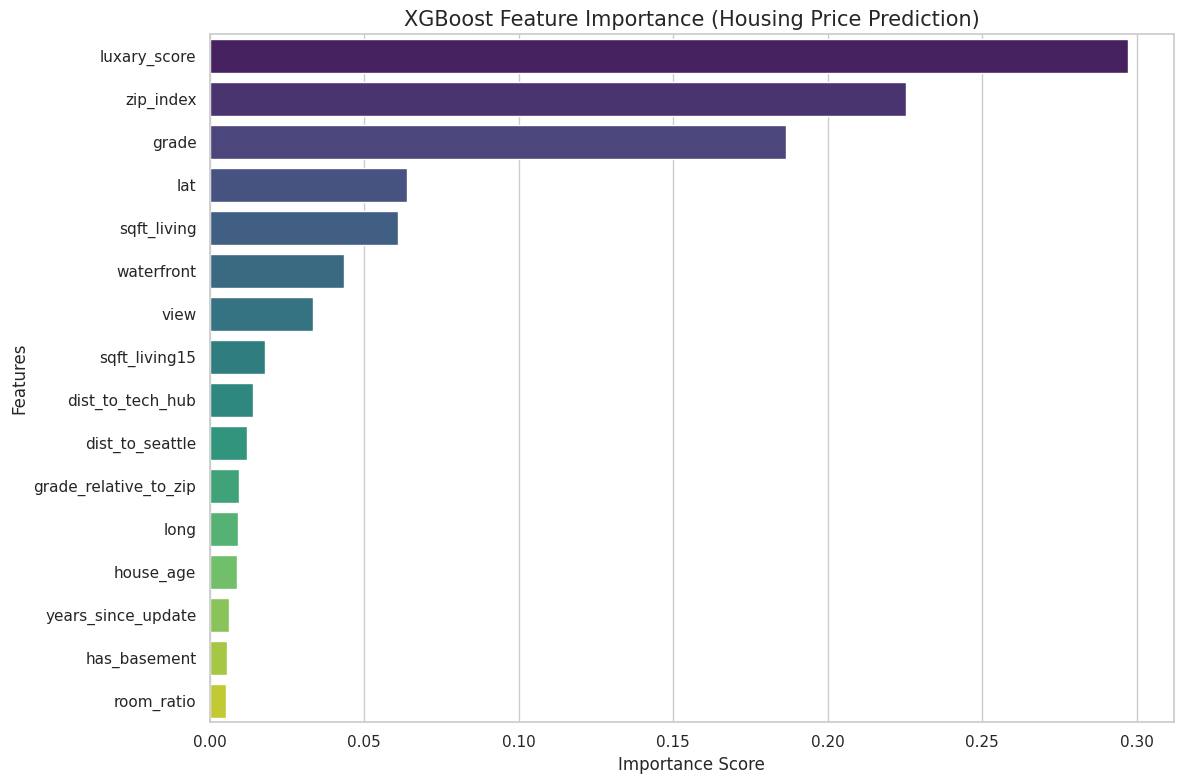

Top 10 Important Features:
                  Feature  Importance
9            luxary_score    0.297264
7               zip_index    0.225273
3                   grade    0.186676
4                     lat    0.063814
0             sqft_living    0.061043
1              waterfront    0.043652
2                    view    0.033460
6           sqft_living15    0.017784
14       dist_to_tech_hub    0.013883
13        dist_to_seattle    0.012133
15  grade_relative_to_zip    0.009659
5                    long    0.009045
11              house_age    0.008859
12     years_since_update    0.006384
10           has_basement    0.005668
8              room_ratio    0.005403


In [ ]:
#Feature Importances

importances = best_model.feature_importances_
feature_names = X_train.columns

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title('XGBoost Feature Importance (Housing Price Prediction)', fontsize=15)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


# Print numerical table
print("Top 10 Important Features:")
print(feature_imp_df)

# HOLDOUT DATASET #

In [ ]:
# # Feature Engineering
# holdout["wh_proportion"] = holdout["MajorAxisLength"] / holdout["MinorAxisLength"]
# holdout["wrinkled"] = holdout["Area"] / holdout["ConvexArea"]

# # predict
# answer = best_xgb.predict(holdout)
# my_predictions = pd.DataFrame(answer, columns=['predictions'])
# my_predictions.to_csv("Yucheol_Son_Raison.csv", index=False)
# print(answer)